## 機器學習中的曲線

Bias 與 Variance是什麽？
* Bias：用來幫我們衡量訓練模型達到了什麽程度，我們希望模型的效果要更好，那就是Bias需要越小越好!
* Variance：訓練集和測試此之間必然存在差異的，我們希望訓練出來的模型應用能力更強(泛化能力)，那麽就需要Variance也是越小越好！

<img src="1.png" style="width:900px;height:280px;float:left">

這些模型看起來Bias都非常的小，但泛化能力還蠻差的!

<img src="2.png" style="width:900px;height:280px;float:left">

這些模型看起來泛化能力還不錯，但是Bias卻很大

## Tradeoff 需要找到合適的平衡點

<img src="3.png" style="width:500px;height:350px;float:left">

Bias和Variance是相愛相殺的!!

* 模型構建的越覆雜Bias會越小，但是Variance也會越大
* 模型構建的越精簡，Bias勢必會增大，但是Variance也會相應減小

目標是找到最合適的平衡點！

## 什麽因素會對bias與variance產生影響呢？先來看看數據集的大小！

<img src="4.png" style="width:500px;height:650px;float:left">

* 很明顯，訓練集樣本點越少，越可以滿足訓練集的需求(模型在訓練集上表現的更好)，但是這樣在測試集上卻會很差！
* 但是隨著訓練集樣本數量的增加可以看到在訓練集上的效果好像也會也平均了，這很難滿足每一個點的需求了，但是測試集的效果會更好一些！

## 訓練集與驗證集的學習曲線

<img src="5.png" style="width:600px;height:250px;float:left">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

先來看看數據長甚麼樣子!

In [2]:
electricity = pd.read_excel('Folds5x2_pp.xlsx')
print(electricity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB
None


In [3]:
electricity.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


觀察不同訓練集的大小對結果的影響

In [4]:
train_sizes = [1 , 100 , 500 , 2000 , 5000 , 7654] # 6種不同大小的訓練集

In [5]:
features = ['AT' , 'V' , 'AP' , 'RH']
target = 'PE'
train_sizes , train_scores , validation_scores = learning_curve(estimator = LinearRegression() ,
                                                                X = electricity[features] ,
                                                                y = electricity[target] ,
                                                                train_sizes = train_sizes ,
                                                                cv = 5 , #5次交叉驗證
                                                                scoring = 'neg_mean_squared_error')

In [6]:
print('Training scores : \n' , train_scores) 
print('\n' , '-' * 90 , '\n') 
print('Validation scores : \n' , validation_scores)

Training scores : 
 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]

 ------------------------------------------------------------------------------------------ 

Validation scores : 
 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


這裡對於訓練集和測試集分別得到了6次結果，因為我們做了6種不同大小的訓練集，每次的結果由5次交叉驗證組成

為了對比，我們選擇5次交叉驗證的平均結果來觀察<br>
可以發現隨著訓練集的資料筆數越來越多，測試集的mean squared error越來越小

In [7]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores : \n', pd.Series(train_scores_mean , index = train_sizes))
print('\n' , '-' * 90 , '\n') 
print('Mean validation scores : \n',pd.Series(validation_scores_mean , index = train_sizes))

Mean training scores : 
 1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7654    20.764877
dtype: float64

 ------------------------------------------------------------------------------------------ 

Mean validation scores : 
 1       423.372638
100      22.392186
500      20.862362
2000     20.822026
5000     20.799673
7654     20.794924
dtype: float64


將上述結果化成曲線圖，觀察一下!

(0, 40)

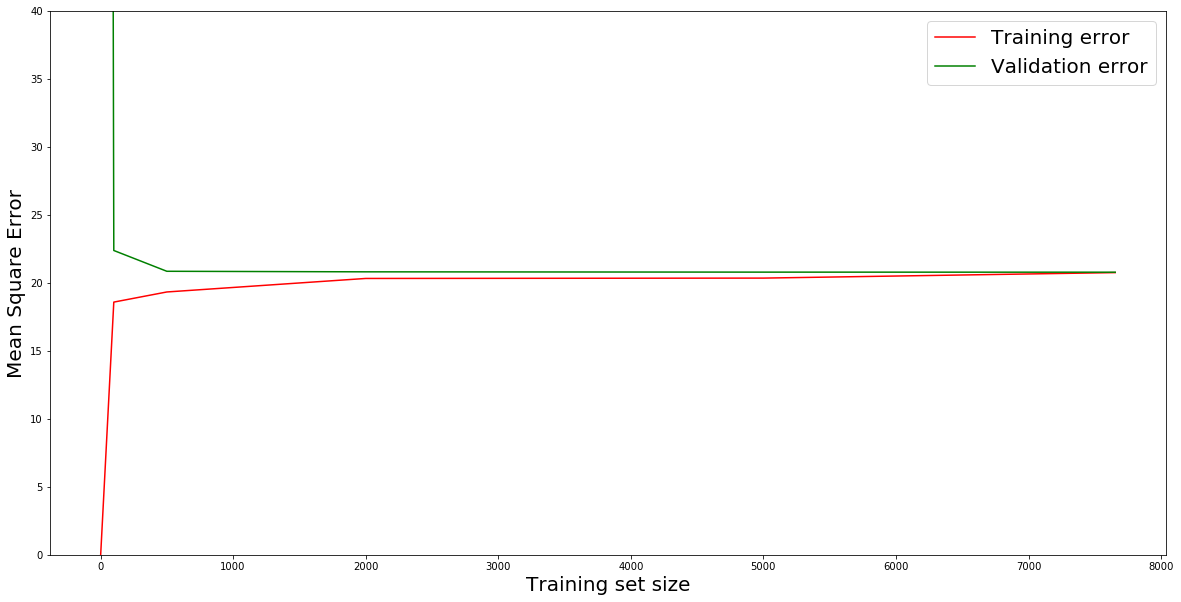

In [8]:
fig, ax = plt.subplots(1 , 1 , figsize = (20 , 10))
ax.plot(train_sizes , train_scores_mean , color = 'red' , label = 'Training error')
plt.plot(train_sizes , validation_scores_mean , color = 'green' , label = 'Validation error')
ax.set_xlabel('Training set size' , fontsize = 20)
ax.set_ylabel('Mean Square Error' , fontsize = 20)
ax.legend(fontsize = 20)
ax.set_ylim(0 , 40)

結果確實跟我們之前的假設是一樣的

那麽數據集一定是越多越好嗎？理論上肯定是的，但是實際上會有飽和點的。

<img src="6.png" style="width:600px;height:250px;float:left">

當我們觀察到結果是左圖的時候我們的核心應該想一下怎麽樣構建模型來增強效果<br>
當結果是右圖的時候我們首先就得先從數據下手了

## Bias與Variance在曲線中的含義

<img src="7.png" style="width:600px;height:250px;float:left">

<img src="8.png" style="width:600px;height:250px;float:left">

那麽如何得到更好的模型呢？
* 根據我們的曲線，是數據的問題找數據的問題，是算法的問題找算法的問題。有針對性的！

可以把上面的程式整理成以下函數，以後可拿來觀察模型bias與variances的情況!

In [9]:
def learning_curves(estimator , data , features , target , train_sizes , cv ,  num_estimator , estimator_name):
    if num_estimator > 1:
        fig , ax = plt.subplots(1 , num_estimator , figsize = (20 , 10))
        
        for i in range(0 , num_estimator):
            train_sizes , train_scores , validation_scores = learning_curve(estimator[i] , 
                                                                            data[features] , 
                                                                            data[target] , 
                                                                            train_sizes = train_sizes ,
                                                                            cv = cv, 
                                                                            scoring = 'neg_mean_squared_error')
            train_scores_mean = -train_scores.mean(axis = 1)
            validation_scores_mean = -validation_scores.mean(axis = 1)
            
            ax[i].plot(train_sizes , train_scores_mean , color = 'red' , label = 'Training error')
            ax[i].plot(train_sizes , validation_scores_mean , color = 'green' , label = 'Validation error')
            ax[i].set_xlabel('Training set size' , fontsize = 20)
            ax[i].set_ylabel('Mean Square Error' , fontsize = 20)
            ax[i].set_title(estimator_name[i] , fontsize = 20)
            ax[i].legend(fontsize = 20)
            ax[i].set_ylim(0 , 40)
            
    elif num_estimator == 1:
        train_sizes , train_scores , validation_scores = learning_curve(estimator , 
                                                                        data[features] , 
                                                                        data[target] , 
                                                                        train_sizes = train_sizes ,
                                                                        cv = cv, 
                                                                        scoring = 'neg_mean_squared_error')
        train_scores_mean = -train_scores.mean(axis = 1)
        validation_scores_mean = -validation_scores.mean(axis = 1)
        
        fig, ax = plt.subplots(1 , 1 , figsize = (20 , 10))
        ax.plot(train_sizes , train_scores_mean , color = 'red' , label = 'Training error')
        plt.plot(train_sizes , validation_scores_mean , color = 'green' , label = 'Validation error')
        ax.set_xlabel('Training set size' , fontsize = 20)
        ax.set_ylabel('Mean Square Error' , fontsize = 20)
        ax.set_title(estimator_name , fontsize = 20)
        ax.legend(fontsize = 20)
        ax.set_ylim(0 , 40)    

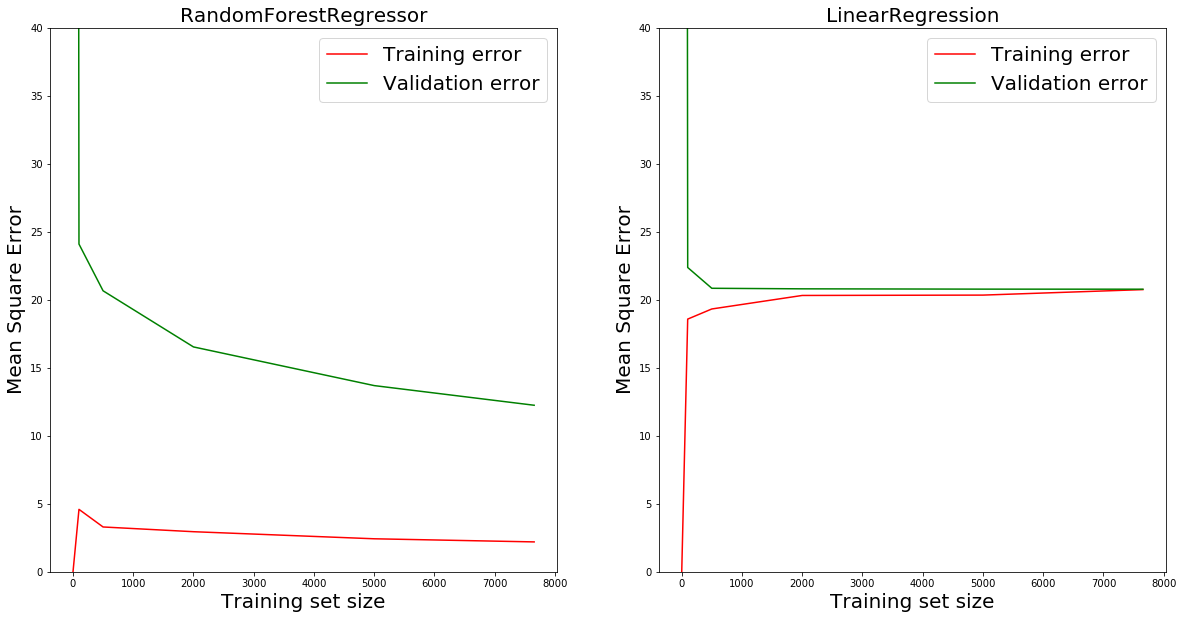

In [10]:
learning_curves([RandomForestRegressor() , LinearRegression()] , 
                electricity , features , target , train_sizes , 5 , 2 , ['RandomForestRegressor' , 'LinearRegression'])

對比發現，線性回歸模型沒有發生過擬合的現象，但是基本也就優化到這樣了，沒多大的空間了<br>

但隨機森林有些過擬合，可以用以下方法消除過擬合現象:
* 需要更多的數據！
* 或加入regularization！

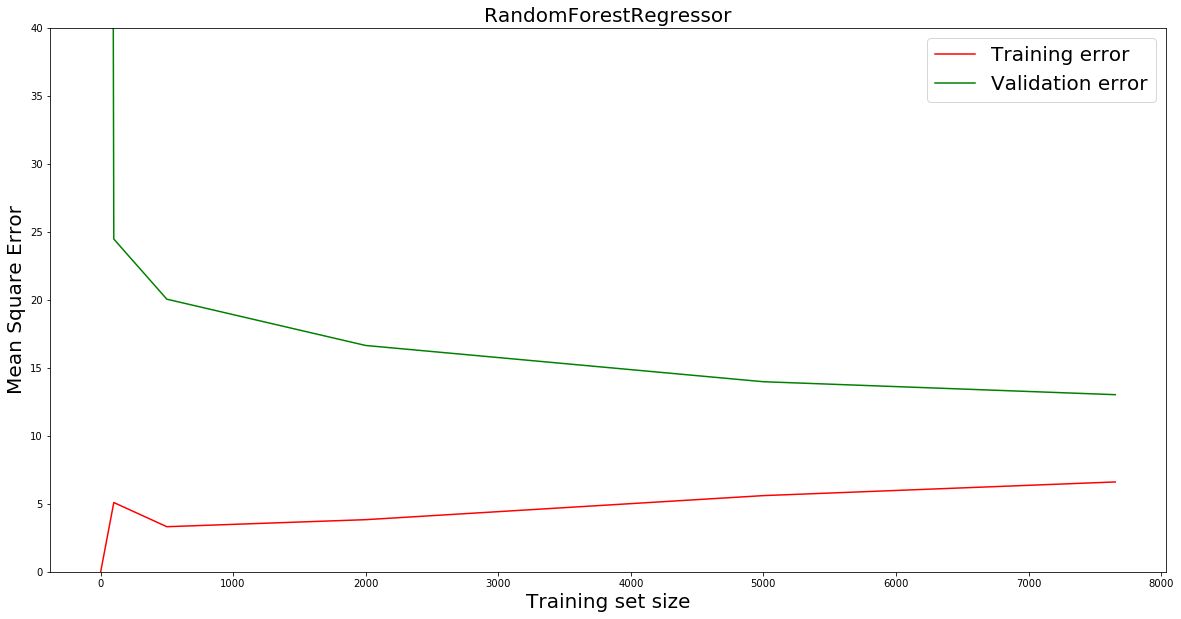

In [11]:
learning_curves(RandomForestRegressor(max_leaf_nodes = 400) , electricity , features, target , train_sizes , 5  , 1 , 'RandomForestRegressor')

variance明顯降低，可以利用調參來消除過擬合現象!

用下面的公式來理解預測結果的成分，目標就是讓reducible error減到最小<br>
<img src="9.png" style="width:358px;height:40px;float:left">

<img src="10.png" style="width:400px;height:300px;float:left">